<a href="https://colab.research.google.com/github/artemtu/projects-by-artemtu/blob/main/telecom_optimal_tariff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение перспективного тарифа для телеком-компании "Мегалайн"

# Открытие и предобработка данных / Check out of data
<a id="start"></a>


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from math import factorial
import math
from scipy import stats as st

In [3]:
calls = pd.read_csv('/content/drive/MyDrive/Pandas_files/my_projects/telecom/calls.csv')
internet =  pd.read_csv('/content/drive/MyDrive/Pandas_files/my_projects/telecom/internet.csv')
tarrifs =  pd.read_csv('/content/drive/MyDrive/Pandas_files/my_projects/telecom/tariffs.csv')
users =  pd.read_csv('/content/drive/MyDrive/Pandas_files/my_projects/telecom/users.csv')
messages = pd.read_csv('/content/drive/MyDrive/Pandas_files/my_projects/telecom/messages.csv')

In [4]:
calls.head(15)

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000
5,1000_5,2018-11-02,0.00,1000
6,1000_6,2018-10-18,0.00,1000
7,1000_7,2018-08-22,18.31,1000
8,1000_8,2018-09-15,18.44,1000
9,1000_9,2018-08-15,0.00,1000


In [5]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [6]:
calls['call_date'] = calls['call_date'].apply(pd.to_datetime) # change format to date

In [7]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  object        
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  float64       
 3   user_id    202607 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 6.2+ MB


In [8]:
calls['month'] = calls['call_date'].dt.month #добавляем столбец с номером месяца / add a column with number of month

In [9]:
calls.head(5)

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.00,1000,7
1,1000_1,2018-08-17,0.00,1000,8
2,1000_2,2018-06-11,2.85,1000,6
3,1000_3,2018-09-21,13.80,1000,9
4,1000_4,2018-12-15,5.18,1000,12


In [10]:
calls['duration'] = np.ceil(calls['duration']).astype(int) #производим округление до целого числа в большую сторону / rounding number to the ceil

In [11]:
calls['id'] = calls['id'].astype(int) #изменяем тип значения / change type

In [12]:
calls.head(5)

,id,call_date,duration,user_id,month
0,10000,2018-07-25,0,1000,7
1,10001,2018-08-17,0,1000,8
2,10002,2018-06-11,3,1000,6
3,10003,2018-09-21,14,1000,9
4,10004,2018-12-15,6,1000,12


In [13]:
calls.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         202607 non-null  int64         
 1   call_date  202607 non-null  datetime64[ns]
 2   duration   202607 non-null  int64         
 3   user_id    202607 non-null  int64         
 4   month      202607 non-null  int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 7.7 MB


In [14]:
internet.head(5)

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


In [15]:
internet.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Unnamed: 0    149396 non-null  int64  
 1   id            149396 non-null  object 
 2   mb_used       149396 non-null  float64
 3   session_date  149396 non-null  object 
 4   user_id       149396 non-null  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB


In [16]:
internet = internet.drop('Unnamed: 0', 1) #удаляем лишний столбец / drop a useless column

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 4.6+ MB


In [18]:
internet['session_date'] = internet['session_date'].apply(pd.to_datetime) #приводим значения к формату дат / change format to datetime

In [19]:
internet.head(5)

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [20]:
internet['month'] = internet['session_date'].dt.month # добавляем столбец с номером месяца / add a column with nubmer of the month

In [21]:
internet.head(5)

,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


In [22]:
tarrifs 

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [23]:
tarrifs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   messages_included      2 non-null      int64 
 1   mb_per_month_included  2 non-null      int64 
 2   minutes_included       2 non-null      int64 
 3   rub_monthly_fee        2 non-null      int64 
 4   rub_per_gb             2 non-null      int64 
 5   rub_per_message        2 non-null      int64 
 6   rub_per_minute         2 non-null      int64 
 7   tariff_name            2 non-null      object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


In [24]:
users.head(5)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [25]:
users['full_name'] = users['first_name'] + ' ' + users['last_name'] # добавляем стобец с именем и фамилией, чтобы проверить на наличие дубликатов / add a column with the name and surname for the checking duplicates

In [26]:
users['full_name'].duplicated().sum() # проверяем наличие дубликатов по ФИ / check out duplicates for the full name

0

In [27]:
users['age'].unique() # проверяем возраст

array([52, 41, 59, 23, 68, 67, 21, 65, 63, 24, 26, 44, 38, 36, 64, 58, 73,
       71, 61, 72, 42, 56, 32, 62, 20, 51, 28, 66, 31, 37, 47, 40, 69, 48,
       33, 39, 43, 46, 45, 55, 53, 34, 49, 25, 18, 70, 50, 19, 54, 60, 29,
       27, 74, 22, 30, 75, 57, 35])

In [28]:
users['city'].unique() # проверяем уникальное значение городов / check out unique cities

array(['Краснодар', 'Москва', 'Стерлитамак', 'Новокузнецк',
       'Набережные Челны', 'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень',
       'Самара', 'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа',
       'Томск', 'Чита', 'Мурманск', 'Петрозаводск', 'Тверь',
       'Екатеринбург', 'Махачкала', 'Вологда', 'Череповец', 'Ярославль',
       'Сочи', 'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула',
       'Саратов', 'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск',
       'Калуга', 'Якутск', 'Астрахань', 'Химки', 'Владикавказ',
       'Волгоград', 'Саранск', 'Ижевск', 'Новосибирск', 'Брянск',
       'Тольятти', 'Нижний Тагил', 'Орёл', 'Белгород', 'Воронеж',
       'Волжский', 'Курган', 'Барнаул', 'Красноярск', 'Архангельск',
       'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза', 'Магнитогорск',
       'Нижний Новгород', 'Кострома', 'Владивосток', 'Тамбов', 'Балашиха',
       'Севастополь', 'Калининград', 'Оренбург', 'Смоленск',
       'Нижневартовск', 'Владимир', 'Новороссий

In [29]:
users.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
 8   full_name   500 non-null    object
dtypes: int64(2), object(7)
memory usage: 35.3+ KB


In [30]:
users[['churn_date', 'reg_date' ]] = users[['churn_date', 'reg_date' ]].apply(pd.to_datetime) #приводим значения к дате / change format to date


In [31]:
users.info() # проверяем внесенные изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   age         500 non-null    int64         
 2   churn_date  38 non-null     datetime64[ns]
 3   city        500 non-null    object        
 4   first_name  500 non-null    object        
 5   last_name   500 non-null    object        
 6   reg_date    500 non-null    datetime64[ns]
 7   tariff      500 non-null    object        
 8   full_name   500 non-null    object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 35.3+ KB


In [32]:
messages.head(5)

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [33]:
messages['message_date'] = messages['message_date'].apply(pd.to_datetime) # приводим значения к формату дата / change format to date

In [34]:
messages['month'] = messages['message_date'].dt.month # добавляем столбец с номером месяца / add a column with number of month

In [35]:
messages.info() # проверяем внесенные изменения

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            123036 non-null  object        
 1   message_date  123036 non-null  datetime64[ns]
 2   user_id       123036 non-null  int64         
 3   month         123036 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.8+ MB


We discovered the data and checked out duplicates, transformed columns to the necessary type

# Объединение таблиц / Join tables



<a id="join"></a>

In [36]:
messages.pivot_table(index='user_id', values='id', aggfunc='count')#формируем сводную таблицу с кол-вом отправленных смс / pivot table with quantity of sent SMS

,id
user_id,
1000,496
1002,70
1003,380
1004,1192
1005,552
...,...
1495,340
1496,468
1497,51


In [37]:
c1 = calls.pivot_table(index=['user_id', 'month'], values='duration', aggfunc='sum') # формируем сводную таблицу по ID и месяцам / create a pivot table on ID and month

In [38]:
c1

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466
...                 ...
1498    10          247
1499    9            70
        10          449
        11          612
        12          492

[3174 rows x 1 columns]

In [39]:
m1 = messages.pivot_table(index=['user_id', 'month'],values='id' ,aggfunc='count') # формируем сводную таблицу по ID и месяцам / create a pivot table on ID and month

In [40]:
m1

id
user_id month    
1000    5      22
        6      60
        7      75
        8      81
        9      57
...            ..
1498    10     42
1499    9      11
        10     48
        11     59
        12     66

[2717 rows x 1 columns]

In [41]:
internet1 = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum')# формируем сводную таблицу по ID и месяцам / create a pivot table on ID and month

In [42]:
internet1

mb_used
user_id month          
1000    5       2253.49
        6      23233.77
        7      14003.64
        8      14055.93
        9      14568.91
...                 ...
1498    10     20579.36
1499    9       1845.75
        10     17788.51
        11     17963.31
        12     13055.58

[3203 rows x 1 columns]

In [43]:
internet1['gb_used'] =np.ceil(internet1['mb_used'] / 1024) # add a new column with Gb

In [44]:
internet1 = internet1.drop('mb_used', 1) # drop the column with Mb

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [45]:
internet1

gb_used
user_id month         
1000    5          3.0
        6         23.0
        7         14.0
        8         14.0
        9         15.0
...                ...
1498    10        21.0
1499    9          2.0
        10        18.0
        11        18.0
        12        13.0

[3203 rows x 1 columns]

In [46]:
users = users[['user_id', 'tariff', 'city']]# оставляем нужные столбцы в таблице users / take necessary columns

In [47]:
piv = c1.join(m1, how='outer') #соединяем звонки и смс / join tables: calls and SMS

In [48]:
piv

duration    id
user_id month                
1000    5         159.0  22.0
        6         172.0  60.0
        7         340.0  75.0
        8         408.0  81.0
        9         466.0  57.0
...                 ...   ...
1498    10        247.0  42.0
1499    9          70.0  11.0
        10        449.0  48.0
        11        612.0  59.0
        12        492.0  66.0

[3213 rows x 2 columns]

In [49]:
piv1 = piv.join(internet1, how='outer') # добавляем данные по интернету к сводной таблице / join the data of the internet

In [50]:
piv1 # смотрим на результат

duration    id  gb_used
user_id month                         
1000    5         159.0  22.0      3.0
        6         172.0  60.0     23.0
        7         340.0  75.0     14.0
        8         408.0  81.0     14.0
        9         466.0  57.0     15.0
...                 ...   ...      ...
1498    10        247.0  42.0     21.0
1499    9          70.0  11.0      2.0
        10        449.0  48.0     18.0
        11        612.0  59.0     18.0
        12        492.0  66.0     13.0

[3214 rows x 3 columns]

In [51]:
df1 = piv1.merge(users,on='user_id', how='left').set_axis(piv1.index, inplace=False)#добавляем данные по пользователям / add the data on users

In [52]:
df1

user_id  duration    id  gb_used tariff         city
user_id month                                                      
1000    5         1000     159.0  22.0      3.0  ultra    Краснодар
        6         1000     172.0  60.0     23.0  ultra    Краснодар
        7         1000     340.0  75.0     14.0  ultra    Краснодар
        8         1000     408.0  81.0     14.0  ultra    Краснодар
        9         1000     466.0  57.0     15.0  ultra    Краснодар
...                ...       ...   ...      ...    ...          ...
1498    10        1498     247.0  42.0     21.0  smart  Владикавказ
1499    9         1499      70.0  11.0      2.0  smart        Пермь
        10        1499     449.0  48.0     18.0  smart        Пермь
        11        1499     612.0  59.0     18.0  smart        Пермь
        12        1499     492.0  66.0     13.0  smart        Пермь

[3214 rows x 6 columns]

In [53]:
tarrifs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [54]:
tarrifs = tarrifs.rename(columns={'tariff_name': 'tariff'}) #переименовываем столбец / rename the column

In [55]:
tarrifs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [56]:
df = df1.merge(tarrifs, on='tariff', how='left').set_axis(piv1.index, inplace=False) #добавляем информацию по тарифам в общую сводную таблицу / join the tariff

In [57]:
df

user_id  duration    id  gb_used tariff         city  \
user_id month                                                         
1000    5         1000     159.0  22.0      3.0  ultra    Краснодар   
        6         1000     172.0  60.0     23.0  ultra    Краснодар   
        7         1000     340.0  75.0     14.0  ultra    Краснодар   
        8         1000     408.0  81.0     14.0  ultra    Краснодар   
        9         1000     466.0  57.0     15.0  ultra    Краснодар   
...                ...       ...   ...      ...    ...          ...   
1498    10        1498     247.0  42.0     21.0  smart  Владикавказ   
1499    9         1499      70.0  11.0      2.0  smart        Пермь   
        10        1499     449.0  48.0     18.0  smart        Пермь   
        11        1499     612.0  59.0     18.0  smart        Пермь   
        12        1499     492.0  66.0     13.0  smart        Пермь   

               messages_included  mb_per_month_included  minutes_included  \
user_id month                                                               
1000    5                   1000                  30720              3000   
        6                   1000                  30720              3000   
        7                   1000                  30720              3000   
        8                   1000                  30720              3000   
        9                   1000                  30720              3000   
...                          ...                    ...               ...   
1498    10                    50                  15360               500   
1499    9                     50                  15360               500   
        10                    50                  15360               500   
        11                    50                  15360               500   
        12                    50                  15360               500   

               rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  
user_id month                                                                
1000    5                 1950         150                1               1  
        6                 1950         150                1               1  
        7                 1950         150                1               1  
        8                 1950         150                1               1  
        9                 1950         150                1               1  
...                        ...         ...              ...             ...  
1498    10                 550         200                3               3  
1499    9                  550         200                3               3  
        10                 550         200                3               3  
        11                 550         200                3               3  
        12                 550         200                3               3  

[3214 rows x 13 columns]

In [58]:
df = df.rename(columns={'id': 'sent_mess'}) #переименовываем столбец с кол-вом отправленных смс / rename columns

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   duration               3174 non-null   float64
 2   sent_mess              2717 non-null   float64
 3   gb_used                3203 non-null   float64
 4   tariff                 3214 non-null   object 
 5   city                   3214 non-null   object 
 6   messages_included      3214 non-null   int64  
 7   mb_per_month_included  3214 non-null   int64  
 8   minutes_included       3214 non-null   int64  
 9   rub_monthly_fee        3214 non-null   int64  
 10  rub_per_gb             3214 non-null   int64  
 11  rub_per_message        3214 non-null   int64  
 12  rub_per_minute         3214 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 356.4+ KB


In [60]:
df = df.fillna(0) #заменяем все пропущенные значения на нуль / fill the gaps

In [61]:
df.info() #проверяем внесенные изменения

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   duration               3214 non-null   float64
 2   sent_mess              3214 non-null   float64
 3   gb_used                3214 non-null   float64
 4   tariff                 3214 non-null   object 
 5   city                   3214 non-null   object 
 6   messages_included      3214 non-null   int64  
 7   mb_per_month_included  3214 non-null   int64  
 8   minutes_included       3214 non-null   int64  
 9   rub_monthly_fee        3214 non-null   int64  
 10  rub_per_gb             3214 non-null   int64  
 11  rub_per_message        3214 non-null   int64  
 12  rub_per_minute         3214 non-null   int64  
dtypes: float64(3), int64(8), object(2)
memory usage: 356.4+ KB


In [62]:
df['mb_per_month_included'] = df['mb_per_month_included'] / 1024 #вычисляем кол-во гб в тарифе / transform Mb to Gb in the column

In [63]:
df = df.rename(columns={'mb_per_month_included': 'gb_per_month_included'}) #переименовываем столбец / rename the column

In [64]:
df.head(3)

user_id  duration  sent_mess  gb_used tariff       city  \
user_id month                                                            
1000    5         1000     159.0       22.0      3.0  ultra  Краснодар   
        6         1000     172.0       60.0     23.0  ultra  Краснодар   
        7         1000     340.0       75.0     14.0  ultra  Краснодар   

               messages_included  gb_per_month_included  minutes_included  \
user_id month                                                               
1000    5                   1000                   30.0              3000   
        6                   1000                   30.0              3000   
        7                   1000                   30.0              3000   

               rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  
user_id month                                                                
1000    5                 1950         150                1               1  
        6                 1950         150                1               1  
        7                 1950         150                1               1

In [65]:
df['over_duration'] = df['duration'] -  df['minutes_included'] 
df['over_internet'] = df['gb_used'] -  df['gb_per_month_included'] 
df['over_sms'] = df['sent_mess'] -  df['messages_included'] 

In [66]:
def got_revenue(row):
    revenue_by_min = 0
    revenue_by_messages = 0
    revenue_mb = 0

    if row['over_duration'] > 0:
      revenue_by_min = row['over_duration'] * row['rub_per_minute']
    if row['over_internet'] > 0:
      revenue_mb = row['over_internet'] * row['rub_per_gb']
    if row['over_sms'] > 0:
      revenue_by_messages = row['over_sms'] * row['rub_per_message'] 
    return revenue_by_min + revenue_mb + revenue_by_messages
df['got_revenue'] = df.apply(got_revenue, axis=1)

#функция, которая посчитает выручку от тех, кто перерасходовал ту или иную опцию в тарифе 
#create a function that counts revenue from users who used an extra tariff

In [67]:
df

user_id  duration  sent_mess  gb_used tariff         city  \
user_id month                                                              
1000    5         1000     159.0       22.0      3.0  ultra    Краснодар   
        6         1000     172.0       60.0     23.0  ultra    Краснодар   
        7         1000     340.0       75.0     14.0  ultra    Краснодар   
        8         1000     408.0       81.0     14.0  ultra    Краснодар   
        9         1000     466.0       57.0     15.0  ultra    Краснодар   
...                ...       ...        ...      ...    ...          ...   
1498    10        1498     247.0       42.0     21.0  smart  Владикавказ   
1499    9         1499      70.0       11.0      2.0  smart        Пермь   
        10        1499     449.0       48.0     18.0  smart        Пермь   
        11        1499     612.0       59.0     18.0  smart        Пермь   
        12        1499     492.0       66.0     13.0  smart        Пермь   

               messages_included  gb_per_month_included  minutes_included  \
user_id month                                                               
1000    5                   1000                   30.0              3000   
        6                   1000                   30.0              3000   
        7                   1000                   30.0              3000   
        8                   1000                   30.0              3000   
        9                   1000                   30.0              3000   
...                          ...                    ...               ...   
1498    10                    50                   15.0               500   
1499    9                     50                   15.0               500   
        10                    50                   15.0               500   
        11                    50                   15.0               500   
        12                    50                   15.0               500   

               rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  \
user_id month                                                                 
1000    5                 1950         150                1               1   
        6                 1950         150                1               1   
        7                 1950         150                1               1   
        8                 1950         150                1               1   
        9                 1950         150                1               1   
...                        ...         ...              ...             ...   
1498    10                 550         200                3               3   
1499    9                  550         200                3               3   
        10                 550         200                3               3   
        11                 550         200                3               3   
        12                 550         200                3               3   

               over_duration  over_internet  over_sms  got_revenue  
user_id month                                                       
1000    5            -2841.0          -27.0    -978.0          0.0  
        6            -2828.0           -7.0    -940.0          0.0  
        7            -2660.0          -16.0    -925.0          0.0  
        8            -2592.0          -16.0    -919.0          0.0  
        9            -2534.0          -15.0    -943.0          0.0  
...                      ...            ...       ...          ...  
1498    10            -253.0            6.0      -8.0       1200.0  
1499    9             -430.0          -13.0     -39.0          0.0  
        10             -51.0            3.0      -2.0        600.0  
        11             112.0            3.0       9.0        963.0  
        12              -8.0           -2.0      16.0         48.0  

[3214 rows x 17 columns]

In [68]:
df['total_revenue'] = df['rub_monthly_fee'] + df['got_revenue'] #считаем итоговую выручку от каждого пользователя в месяц / count sum of revenue from every user

In [69]:
df

user_id  duration  sent_mess  gb_used tariff         city  \
user_id month                                                              
1000    5         1000     159.0       22.0      3.0  ultra    Краснодар   
        6         1000     172.0       60.0     23.0  ultra    Краснодар   
        7         1000     340.0       75.0     14.0  ultra    Краснодар   
        8         1000     408.0       81.0     14.0  ultra    Краснодар   
        9         1000     466.0       57.0     15.0  ultra    Краснодар   
...                ...       ...        ...      ...    ...          ...   
1498    10        1498     247.0       42.0     21.0  smart  Владикавказ   
1499    9         1499      70.0       11.0      2.0  smart        Пермь   
        10        1499     449.0       48.0     18.0  smart        Пермь   
        11        1499     612.0       59.0     18.0  smart        Пермь   
        12        1499     492.0       66.0     13.0  smart        Пермь   

               messages_included  gb_per_month_included  minutes_included  \
user_id month                                                               
1000    5                   1000                   30.0              3000   
        6                   1000                   30.0              3000   
        7                   1000                   30.0              3000   
        8                   1000                   30.0              3000   
        9                   1000                   30.0              3000   
...                          ...                    ...               ...   
1498    10                    50                   15.0               500   
1499    9                     50                   15.0               500   
        10                    50                   15.0               500   
        11                    50                   15.0               500   
        12                    50                   15.0               500   

               rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  \
user_id month                                                                 
1000    5                 1950         150                1               1   
        6                 1950         150                1               1   
        7                 1950         150                1               1   
        8                 1950         150                1               1   
        9                 1950         150                1               1   
...                        ...         ...              ...             ...   
1498    10                 550         200                3               3   
1499    9                  550         200                3               3   
        10                 550         200                3               3   
        11                 550         200                3               3   
        12                 550         200                3               3   

               over_duration  over_internet  over_sms  got_revenue  \
user_id month                                                        
1000    5            -2841.0          -27.0    -978.0          0.0   
        6            -2828.0           -7.0    -940.0          0.0   
        7            -2660.0          -16.0    -925.0          0.0   
        8            -2592.0          -16.0    -919.0          0.0   
        9            -2534.0          -15.0    -943.0          0.0   
...                      ...            ...       ...          ...   
1498    10            -253.0            6.0      -8.0       1200.0   
1499    9             -430.0          -13.0     -39.0          0.0   
        10             -51.0            3.0      -2.0        600.0   
        11             112.0            3.0       9.0        963.0   
        12              -8.0           -2.0      16.0         48.0   

               total_revenue  
user_id month                 
1000    5             1

We prepared the final table to analyze

# Среднее значение, стандартное отклонение и графики / Mean , standard deviation and graphics
<a id="plot"></a>

In [70]:
mean_std = df.pivot_table(index='tariff', values=['duration', 'sent_mess', 'gb_used'], aggfunc=['mean', 'std' , 'var']) #делаем сводную таблицу со средним значением и стандартным отклонением / create a pivot table with mean and std diversion

In [71]:
mean_std 

mean                               std                       \
          duration    gb_used  sent_mess    duration   gb_used  sent_mess   
tariff                                                                      
smart   417.934948  16.328847  33.384029  190.313730  5.747061  28.227876   
ultra   526.623350  19.494416  49.363452  317.606098  9.853511  47.804457   

                  var                          
             duration    gb_used    sent_mess  
tariff                                         
smart    36219.315784  33.028705   796.812958  
ultra   100873.633397  97.091686  2285.266143

In [72]:
smart = df.loc[df['tariff'] == 'smart'] #выделяем данные из общего датасета в отдельную таблицу / query the data on necessary tariff

In [73]:
smart = smart[['duration', 'sent_mess', 'gb_used']] #оставляем нужные столбцы для анализа / cut only useful columns

In [74]:
smart.info() # проверяем инфо 

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2229 entries, (1001, 11) to (1499, 12)
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   duration   2229 non-null   float64
 1   sent_mess  2229 non-null   float64
 2   gb_used    2229 non-null   float64
dtypes: float64(3)
memory usage: 79.3 KB


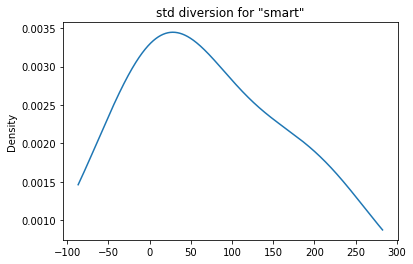

In [94]:
np.std(smart, ddof=1).plot(kind='kde') #строим график стандартного отклонения / create a graphic with std diversion
plt.title('std diversion for "smart"')
plt.show()

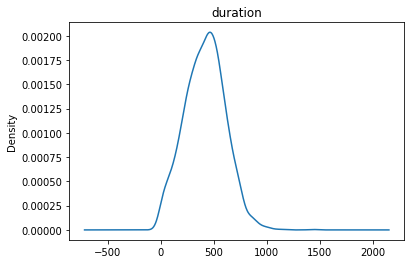

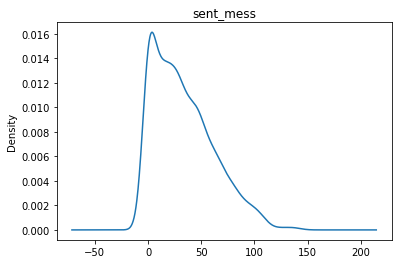

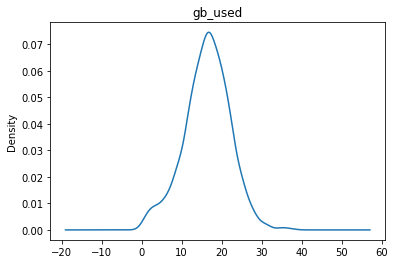

['duration', 'sent_mess', 'gb_used']

In [118]:
smart_list = ['duration', 'sent_mess', 'gb_used']
for column in smart_list:
  smart[column].plot(
      kind = "kde",
      ),
  plt.title(label=column)
  plt.show()
smart_list

# функция, которая строит гистрограммы по длительности звонков, отпр. смс и использованных ГБ
# a function that creates graphics on duration calls, sent SMS, used Gb

In [77]:
ultra = df.loc[df['tariff'] == 'ultra']
ultra = ultra[['duration', 'sent_mess', 'gb_used']]

#создаем отдельный фрейм по тарифу ультра, оставляем только нужные столбцы
# query the data on "ultra" and take necessary columns

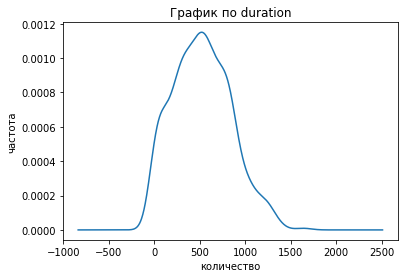

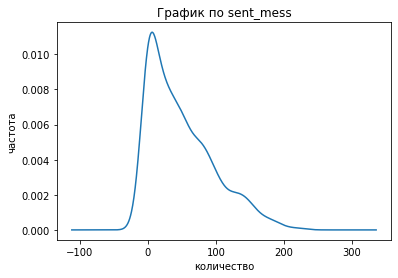

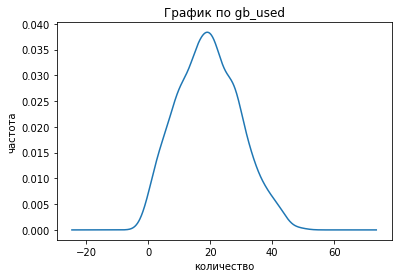

['duration', 'sent_mess', 'gb_used']

In [78]:
ultra_list = ['duration', 'sent_mess', 'gb_used']
for column in ultra_list:
  ultra[column].plot(
      kind = "kde",
     )
  plt.title("График по " + str(column))
  plt.xlabel("количество")
  plt.ylabel("частота")
  plt.show()
ultra_list

#функция, которые строит график распределения для длительности звонков, отпр. смс и потраченных ГБ
# a function that creates graphics on duration calls, sent SMS, used Gb

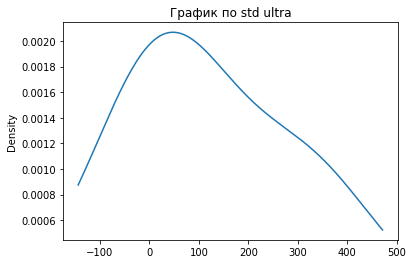

In [121]:
np.std(ultra, ddof=1).plot(kind='kde'), plt.title("График по std ultra" ) #cтандартное отклонеие на графике для тарифа ультра
plt.show()

In [80]:
np.var(smart, ddof=1) #получаем дисперсию для тарифа смарт # dispersion for "smart"

duration     36219.315784
sent_mess      796.812958
gb_used         33.028705
dtype: float64

In [81]:
np.var(ultra, ddof=1)#получаем дисперсию для тарифа ультра / dispersion for "ultra"

duration     100873.633397
sent_mess      2285.266143
gb_used          97.091686
dtype: float64

In [82]:
rev_smar_mean = df.query('(tariff == "smart")')
rev_smar_mean = rev_smar_mean['total_revenue']
#создаем фрейм для проверки гипотезы. Тариф смарт

# create a df for checking a hyp. on "smart"

In [83]:
rev_ultra_mean = df.query('(tariff == "ultra")')
rev_ultra_mean = rev_ultra_mean['total_revenue']
#создаем фрейм для проверки гипотезы. Тариф Ультра

# create a df for checking a hyp. on "ultra"

Н0 - средняя выручка смарт и ультра равны / mean revenue 'smart' and 'ultra' equals

H1 - cредняя выручка смарт и ультра НЕ равны / mean revenue 'smart' and 'ultra' unequals 

In [123]:
alpha = 0.05  
results = st.ttest_ind(rev_smar_mean , rev_ultra_mean)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу / reject H0')
else:
    print('Не получилось отвергнуть нулевую гипотезу / couldnt reject H0')
#проверка гипотезы

p-значение: 1.4229814360764067e-160
Отвергаем нулевую гипотезу / reject H0


In [85]:
moscow = df.query('(city == "Москва")') #cоздаем фрейм по г. Москва / create a df with clients from Moscow

In [86]:
moscow['city'].unique()

array(['Москва'], dtype=object)

In [87]:
moscow = moscow['total_revenue']

In [88]:
other_cities = df.query('(city != "Москва")') #создаем фрейм с другими городами (кроме Мск) /  create a df with clients from other cities

In [89]:
other_cities['city'].unique()

array(['Краснодар', 'Стерлитамак', 'Новокузнецк', 'Набережные Челны',
       'Ульяновск', 'Челябинск', 'Пермь', 'Тюмень', 'Самара',
       'Санкт-Петербург', 'Иваново', 'Чебоксары', 'Омск', 'Уфа', 'Томск',
       'Чита', 'Мурманск', 'Петрозаводск', 'Тверь', 'Екатеринбург',
       'Махачкала', 'Вологда', 'Череповец', 'Ярославль', 'Сочи',
       'Хабаровск', 'Ставрополь', 'Рязань', 'Улан-Удэ', 'Тула', 'Саратов',
       'Ростов-на-Дону', 'Казань', 'Иркутск', 'Курск', 'Калуга', 'Якутск',
       'Астрахань', 'Химки', 'Владикавказ', 'Волгоград', 'Саранск',
       'Ижевск', 'Новосибирск', 'Брянск', 'Тольятти', 'Нижний Тагил',
       'Орёл', 'Белгород', 'Воронеж', 'Курган', 'Барнаул', 'Красноярск',
       'Архангельск', 'Липецк', 'Кемерово', 'Киров', 'Сургут', 'Пенза',
       'Волжский', 'Магнитогорск', 'Нижний Новгород', 'Кострома',
       'Владивосток', 'Тамбов', 'Балашиха', 'Севастополь', 'Калининград',
       'Оренбург', 'Смоленск', 'Нижневартовск', 'Владимир',
       'Новороссийск', 'Гроз

In [90]:
other_cities = other_cities['total_revenue']

Н0 - средняя выручка московских пользователей равна средней выручке по другим городам / mean revenue between Moscow and other cities equal

H1 - средняя выручка московских пользователей НЕ равна средней выручке по другим городам / mean revenue between Moscow and other cities unequal

In [125]:
alpha = 0.05  
results = st.ttest_ind(moscow , other_cities)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу / reject H0')
else:
    print('Не получилось отвергнуть нулевую гипотезу / couldnt reject H0') 

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу / couldnt reject H0


# Общий вывод / Conclusion
<a id="final"></a>

1. SMS isn't a popular option in both tariffs. Actually, people prefer the internet, and we know that a lot of people use social media and messengers like what's up, telegram etc
2. Mean showed us that users "ultra" more activity than users "smart". However, std dispersion has a difference in both tariffs in duration calls. "smart" showed std = 190, "ultra" = 317. We couldn't believe to mean counts
3. Graphics for "smart" and "ultra" looks like a normal distribution
4. The first hypothesis about the mean difference between "ultra" and "smart" was rejected. Mean count from "smart" gave us 1290 rur, "ultra" - 2070 rur
The Second hypothesis about mean revenue between users from Moscow and other regions wasn't rejected
5. The optimal tariff for the operator is "ultra"

1. При проверке данных ошибок мы не обнаружили. Нулевые значения в таблице звонков - входящие звонки, проверяили дубликаты по ФИ пользователей, проверили уникальные значения городов
2. СМС сообщения. Кажется, эпоха СМС проходит, судя по средним значениям, люди практически перестали пользоваться этой услугой.Это логично, сейчас почти все используют мессенджеры, такие как: WhatsApp, Telegram, Viber и пр. С точки зрения пользователя, было бы логично сократить пакет с СМС и добавить интернет-трафик
3. Среднее значение и стандартное отклонение. Среднее значение явно показывает нам то, что пользователи тарифа "Ультра" активнее по всем фронтам: звонки, смс, интернет. Однако, стандартное отклонение довольно сильно отличается от среднего в обоих тарифах в плане длительности звонков. Чем ближе значение к нулю, тем меньше разброс, а у нас в тарифе "Смарт" стд = 190, а у тарифа "Ультра" = 317. То есть положиться на среднее мы явно не можем. Точно также можем сказать про интернет и СМС
4. Графики по тарифу "Смарт". Звонки и интернет косвенно похожи на нормальное распределение, однако у СМС идет подъем с углом 90 градусов, что явно не похоже на нормальное распределение. У Тарифа "Ультра" ситуация абсолютна идентичная. График стандартного отклонения в обоих тарифам похож на нормальное распредедение
5. Проверка гипотезы "Средняя выручка тарифов смарт и ультра равны и не равны". Нулевой гипотезой у нас была "средняя выручка смарт и ультра равны" - мы её отвергли. Проверив цифры, мы убедились, что пользователи "Смарт" приносят в среднем 1290, а "Ультра" - 2070
6. Проверка гипотезы "средняя выручка московских пользователей равна или не равна средней выручке по другим городам". Нулевой гипотезой было "равна", гипотезу отвергнуть не получилось. Проверив цифры, мы получили примерно одинаковое значение, в районе 1530
7. Компании "Мегалайн" однозначно нужно продвигать тариф "Ультра". Возможно, что есть опция переделать лимиты в каждом тарифе, но для этого нам нужна большая выборка, а также очистка от выбросов